In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
pd.options.display.max_columns=None
pd.options.display.max_rows=None
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head(4)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8


In [3]:
df.to_excel('DataSet.xlsx')

In [4]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
df['Population'].fillna((df['Population'].mean()), inplace=True)
df['Adult Mortality'].fillna((df['Adult Mortality'].mean()), inplace=True)
df['infant deaths'].fillna((df['infant deaths'].mean()), inplace=True)
df['GDP'].fillna((df['GDP'].mean()), inplace=True)
df['Schooling'].fillna((df['Schooling'].mean()), inplace=True)
df['percentage expenditure'].fillna((df['percentage expenditure'].mean()), inplace=True)
df['Life expectancy '].fillna((df['Life expectancy '].mean()), inplace=True)
df['Alcohol'].fillna((df['Alcohol'].mean()), inplace=True)

In [6]:
df[['Population','Adult Mortality','infant deaths','GDP','Schooling','percentage expenditure','Life expectancy ','Alcohol']].describe()

,Population,Adult Mortality,infant deaths,GDP,Schooling,percentage expenditure,Life expectancy,Alcohol
count,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,1.275338e+07,164.796448,30.303948,7483.158469,11.992793,738.251295,69.224932,4.602861
std,5.381546e+07,124.080302,117.926501,13136.800417,3.264381,1987.914858,9.507640,3.916288
min,3.400000e+01,1.000000,0.000000,1.681350,0.000000,0.000000,36.300000,0.010000
25%,4.189172e+05,74.000000,0.000000,580.486996,10.300000,4.685343,63.200000,1.092500
50%,3.675929e+06,144.000000,3.000000,3116.561755,12.100000,64.912906,72.000000,4.160000
75%,1.275338e+07,227.000000,22.000000,7483.158469,14.100000,441.534144,75.600000,7.390000
max,1.293859e+09,723.000000,1800.000000,119172.741800,20.700000,19479.911610,89.000000,17.870000


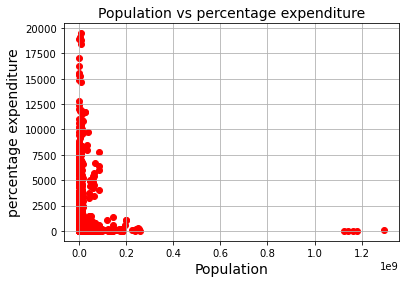

In [7]:
plt.scatter(df['Population'],df['percentage expenditure'], color = 'red')
plt.title("Population vs percentage expenditure", fontsize = 14)
plt.xlabel('Population',fontsize = 14)
plt.ylabel('percentage expenditure', fontsize = 14)
plt.grid(True)
plt.show()

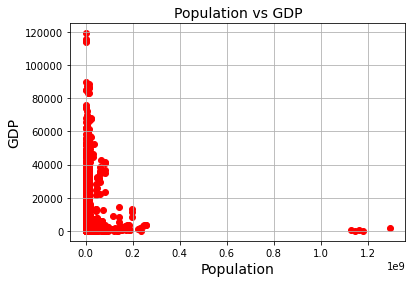

In [8]:
plt.scatter(df['Population'],df['GDP'], color = 'red')
plt.title("Population vs GDP", fontsize = 14)
plt.xlabel('Population',fontsize = 14)
plt.ylabel('GDP', fontsize = 14)
plt.grid(True)
plt.show()

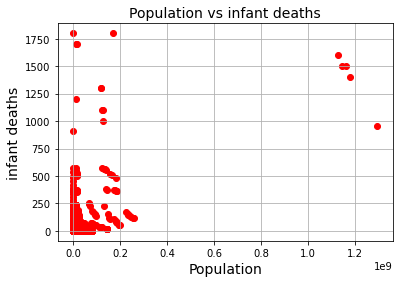

In [9]:
plt.scatter(df['Population'],df['infant deaths'], color = 'red')
plt.title("Population vs infant deaths", fontsize = 14)
plt.xlabel('Population',fontsize = 14)
plt.ylabel('infant deaths', fontsize = 14)
plt.grid(True)
plt.show()

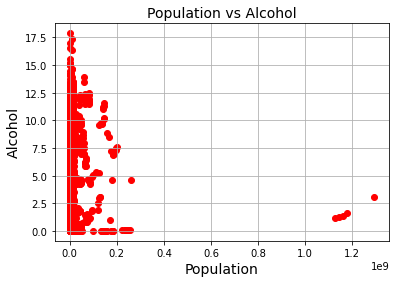

In [10]:
plt.scatter(df['Population'],df['Alcohol'], color = 'red')
plt.title("Population vs Alcohol", fontsize = 14)
plt.xlabel('Population',fontsize = 14)
plt.ylabel('Alcohol', fontsize = 14)
plt.grid(True)
plt.show()

Below will be correlation matrix

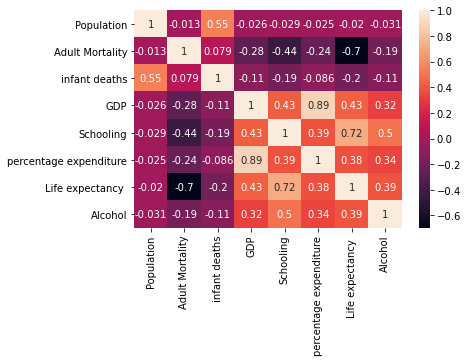

In [11]:
import seaborn as sns

import matplotlib.pyplot as plt


correlation_mat = df[['Population','Adult Mortality','infant deaths','GDP','Schooling','percentage expenditure','Life expectancy ','Alcohol']].corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

Next move is creation of regression

In [12]:
Y = df['Population']
X = df[['Adult Mortality','infant deaths','GDP','Schooling','percentage expenditure','Life expectancy ','Alcohol']]

In [13]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

LinearRegression()

In [14]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -34588073.16544979
Coefficients: 
 [ 4.86730968e+03  2.59562516e+05  8.44334828e+01  5.44248649e+05
 -9.04724718e+02  4.72407562e+05 -1.12928368e+05]


In [15]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          1.72e-230
Time:                        17:49:07   Log-Likelihood:                -55923.
No. Observations:                2938   AIC:                         1.119e+05
Df Residuals:                    2930   BIC:                         1.119e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -3.45

Let's convert DataFRame to multi-index DataFrame

In [16]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
#add column year to index
df = df.set_index('Year', append=True)
#swap indexes
df.index = df.index.swaplevel(0,1)
print(df.head())

                  Country      Status  Life expectancy   Adult Mortality  \
Year                                                                       
2015-01-01 0  Afghanistan  Developing              65.0            263.0   
2014-01-01 1  Afghanistan  Developing              59.9            271.0   
2013-01-01 2  Afghanistan  Developing              59.9            268.0   
2012-01-01 3  Afghanistan  Developing              59.5            272.0   
2011-01-01 4  Afghanistan  Developing              59.2            275.0   

              infant deaths  Alcohol  percentage expenditure  Hepatitis B  \
Year                                                                        
2015-01-01 0             62     0.01               71.279624         65.0   
2014-01-01 1             64     0.01               73.523582         62.0   
2013-01-01 2             66     0.01               73.219243         64.0   
2012-01-01 3             69     0.01               78.184215         67.0   
2011-

In [17]:
from linearmodels import RandomEffects
Y1 = df['Population']

re = RandomEffects(Y1, df[['Adult Mortality','infant deaths','GDP','Schooling','percentage expenditure','Life expectancy ','Alcohol']])
print(re.fit(cov_type = 'clustered', clustered_entity = True))

                        RandomEffects Estimation Summary                        
Dep. Variable:             Population   R-squared:                        0.3440
Estimator:              RandomEffects   R-squared (Between):              0.9395
No. Observations:                2938   R-squared (Within):               0.3085
Date:                Wed, Jan 20 2021   R-squared (Overall):              0.3440
Time:                        17:49:12   Log-likelihood                -5.593e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      219.61
Entities:                          16   P-value                           0.0000
Avg Obs:                       183.62   Distribution:                  F(7,2931)
Min Obs:                       183.00                                           
Max Obs:                       193.00   F-statistic (robust):             111.56
                            

In [18]:
from linearmodels.panel import PanelOLS
mod = PanelOLS(df['Population'], df[['Adult Mortality','infant deaths','GDP','Schooling','percentage expenditure','Life expectancy ','Alcohol']], entity_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res.params)

Adult Mortality           -18782.902666
infant deaths             255368.195895
GDP                          124.095110
Schooling                 752473.683690
percentage expenditure      -873.714057
Life expectancy           -13675.654197
Alcohol                    -7277.836270
Name: parameter, dtype: float64


In [19]:
from linearmodels import PanelOLS
fe_mod = PanelOLS(df['Population'],sm.add_constant(df[['Adult Mortality','infant deaths','GDP','Schooling','percentage expenditure','Life expectancy ','Alcohol']]), entity_effects=True)
fe_res = fe_mod.fit(cov_type='clustered', cluster_entity=True)
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Population   R-squared:                        0.3110
Estimator:                   PanelOLS   R-squared (Between):             -0.0773
No. Observations:                2938   R-squared (Within):               0.3110
Date:                Wed, Jan 20 2021   R-squared (Overall):              0.3097
Time:                        17:49:12   Log-likelihood                -5.592e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      187.97
Entities:                          16   P-value                           0.0000
Avg Obs:                       183.62   Distribution:                  F(7,2915)
Min Obs:                       183.00                                           
Max Obs:                       193.00   F-statistic (robust):             12.151
                            

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(df[['Population','Adult Mortality','infant deaths','GDP','Schooling','percentage expenditure','Life expectancy ','Alcohol']])

,variables,VIF
0,Population,1.524480
1,Adult Mortality,2.370267
2,infant deaths,1.569348
3,GDP,6.595013
4,Schooling,33.744588
5,percentage expenditure,5.497802
6,Life expectancy,31.732579
7,Alcohol,3.259980


After the following line I removed Life expectancy and Schooling

In [21]:
df[['Population','Adult Mortality','infant deaths','GDP','percentage expenditure','Alcohol']]
df.head(4)

,,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
2014-01-01,1,Afghanistan,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2013-01-01,2,Afghanistan,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2012-01-01,3,Afghanistan,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8


Below I tried to normalize data with BoxCox

In [22]:
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
flat_arr = np.array(df[['Population','Adult Mortality','infant deaths','GDP','percentage expenditure','Alcohol']]).flatten()

In [24]:
flat_arr = flat_arr[flat_arr > 0]

<AxesSubplot:>

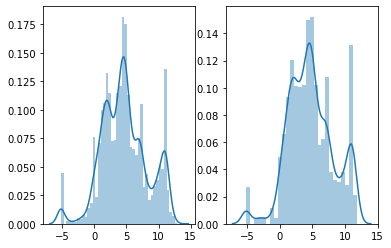

In [25]:
# split into testing & training data
train,test = train_test_split(flat_arr,shuffle=False)

# transform training data & save lambda value
train_data,fitted_lambda = stats.boxcox(train)

# use lambda value to transform test data
test_data = stats.boxcox(test, fitted_lambda)

fig, ax=plt.subplots(1,2)
sns.distplot(train_data, ax=ax[0])
sns.distplot(test_data, ax=ax[1])

Below I'll do a graphical representation of heteroscedasticity/ homoscedasticity

In [26]:
fe_res_resids = fe_res.predict().fitted_values
fe_res_PAnelOLS = fe_res.resids

In [27]:
import matplotlib.pyplot as plt

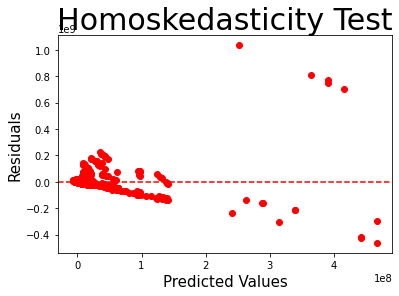

In [28]:
fig, ax = plt.subplots()
ax.scatter(fe_res_resids, fe_res_PAnelOLS, color = 'red')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

Autocorrelation cherck is the next step

In [29]:
PanelOLSdataset = pd.concat([df[['Population','Adult Mortality','infant deaths','GDP','percentage expenditure','Alcohol']], fe_res_PAnelOLS], axis=1)

In [30]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(PanelOLSdataset['residual']) 
print(durbin_watson_test_results)

1.3346890188578144


Check number of Developing and Developed countries

In [31]:
len(df[df['Status'] == 'Developing'])

2426

In [32]:
len(df[df['Status'] != 'Developing'])

512

Below is my attempt to calculate Hausman effect in Python, but I opted for Stata as met major difficulties here

import numpy.linalg as la
from scipy import stats
import numpy as np
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 

    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval
hausman_results = hausman(fe_res, re_res) 
print('chi-Squared:' + str(hausman_results[0]))
print('degrees of freedom:' + str(hausman_results[1]))
print('p-Value:' + str(hausman_results[2]))

Below I'll implement logarithm on Population as it has too big number compared with other figures and it distorts our data

In [33]:
log_pop = np.log(df['Population'])
log_pop.head(4)

Year         
2015-01-01  0    17.334091
2014-01-01  1    12.699494
2013-01-01  2    17.272826
2012-01-01  3    15.123021
Name: Population, dtype: float64

In [34]:
temp = pd.concat([df[['Adult Mortality','infant deaths','GDP','percentage expenditure','Alcohol','Schooling','Life expectancy ']], log_pop], axis=1)

In [35]:
from linearmodels import PanelOLS
fe_mod1 = PanelOLS(log_pop,sm.add_constant(df[['Adult Mortality','infant deaths','GDP','Schooling','percentage expenditure','Life expectancy ','Alcohol']]), entity_effects=True)
fe_res1 = fe_mod1.fit(cov_type='clustered', cluster_entity=True)
print(fe_res1)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Population   R-squared:                        0.0726
Estimator:                   PanelOLS   R-squared (Between):              0.1180
No. Observations:                2938   R-squared (Within):               0.0726
Date:                Wed, Jan 20 2021   R-squared (Overall):              0.0728
Time:                        17:50:02   Log-likelihood                   -6814.3
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      32.594
Entities:                          16   P-value                           0.0000
Avg Obs:                       183.62   Distribution:                  F(7,2915)
Min Obs:                       183.00                                           
Max Obs:                       193.00   F-statistic (robust):             41.930
                            

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(temp)

,variables,VIF
0,Adult Mortality,3.054096
1,infant deaths,1.157907
2,GDP,6.729800
3,percentage expenditure,5.641484
4,Alcohol,3.263987
5,Schooling,33.873262
6,Life expectancy,56.868288
7,Population,29.319381


In [37]:
temp = pd.concat([df[['Adult Mortality','infant deaths','GDP','percentage expenditure','Alcohol']], log_pop], axis=1) 

In [37]:
temp.head(5)

,,Adult Mortality,infant deaths,GDP,percentage expenditure,Alcohol,Schooling,Life expectancy,Population
Year,,,,,,,,,
2015-01-01,0,263.0,62,584.259210,71.279624,0.01,10.1,65.0,17.334091
2014-01-01,1,271.0,64,612.696514,73.523582,0.01,10.0,59.9,12.699494
2013-01-01,2,268.0,66,631.744976,73.219243,0.01,9.9,59.9,17.272826
2012-01-01,3,272.0,69,669.959000,78.184215,0.01,9.8,59.5,15.123021
2011-01-01,4,275.0,71,63.537231,7.097109,0.01,9.5,59.2,14.906964


In [38]:
fe_res_resids1 = fe_res1.predict().fitted_values
fe_res_PAnelOLS1 = fe_res1.resids

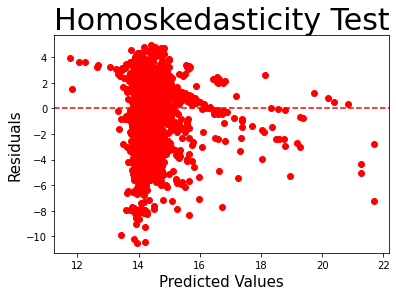

In [39]:
fig, ax = plt.subplots()
ax.scatter(fe_res_resids1, fe_res_PAnelOLS1, color = 'red')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [40]:
PanelOLSdataset1 = pd.concat([temp, fe_res_PAnelOLS1], axis=1)

In [41]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(PanelOLSdataset1['residual']) 
print(durbin_watson_test_results)

0.8798048321845205
